# Tumor Classification using Logistic Regression 

In [1]:
import pandas as pd
from math import e
import numpy as np
import scipy.stats as s
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
# first, drop all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se', 'Unnamed: 32'],
      dtype='object')

In [6]:
df = df.drop(['Unnamed: 32'],axis=1)
data  =  df.iloc[0:,0:]
data.replace('NaN',-1,inplace=True)

data.head()

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
1,842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
2,84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
3,84348301,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
4,84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115


In [7]:
sc = StandardScaler()

In [8]:
X_TrainData = np.array(data.iloc[:400,2:])
X_TrainData = sc.fit_transform(X_TrainData)
print(X_TrainData.shape)
Y_TrainData = []
for i in range(400):
#     print(data.iloc[i,1])
    if data.iloc[i,1] == 'B':
        Y_TrainData.append(0)
    else:
        Y_TrainData.append(1)
Y_TrainData = np.array(Y_TrainData)
print(Y_TrainData.shape)

(400, 12)
(400,)


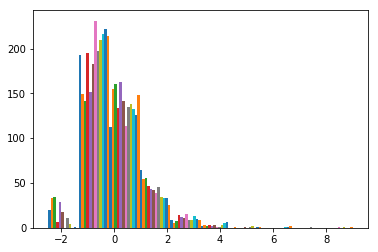

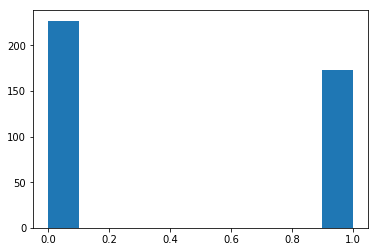

In [9]:
plt.hist(X_TrainData,rwidth=100)
plt.show()
plt.hist(Y_TrainData)
plt.show()

In [10]:
X_TestData = np.array(data.iloc[400:,2:])
X_TestData = sc.fit_transform(X_TestData)
print(X_TestData.shape)
Y_TestData = []
for i in range(X_TestData.shape[0]):
    if data.iloc[i,1] == 'B':
        Y_TestData.append(0)
    else:
        Y_TestData.append(1)
Y_TestData = np.array(Y_TestData)
print(Y_TestData.shape)

(169, 12)
(169,)


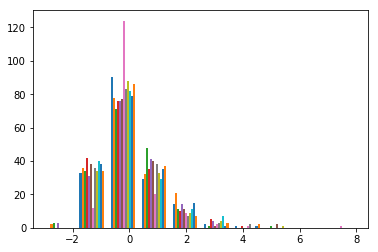

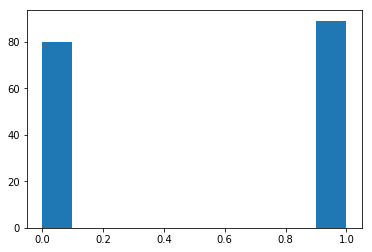

In [11]:
plt.hist(X_TestData)
plt.show()
plt.hist(Y_TestData)
plt.show()

In [12]:
def PCA(Train_Data,Test_Data):
    Cov = np.cov(Train_Data.T)
    eigen_pairs = {}
    eigen_vals,eigen_vecs = np.linalg.eig(Cov)

    for i in range(len(eigen_vals)):
        eigen_pairs[eigen_vals[i]] = eigen_vecs[i] 

    tot = sum(eigen_vals)

    var_exp = [(i/tot) for i in sorted(eigen_vals,reverse= True)]
    cum_var_exp = np.cumsum(var_exp)


    for i in range(len(cum_var_exp)):
        if cum_var_exp[i] >= 0.99999999:
            k = i
            break;

    print("K :",k)
    print("LEN: ",len(eigen_vals))


    sorted(eigen_vals,reverse=True)


    w = []
    for i in eigen_vals:
        w.append(np.real(eigen_pairs[i][:k]))

    w = np.array(w)


    print("w.shape",w.shape)
    X_Train_Data_PCA = Train_Data.dot(w)
    print("X_Train_Data_PCA.shape",X_Train_Data_PCA.shape)

    X_Test_Data_PCA = Test_Data.dot(w)
    print("X_Test_Data_PCA.shape",X_Test_Data_PCA.shape)
    
    return X_Train_Data_PCA,X_Test_Data_PCA

X_Train,X_Test = PCA(X_TrainData,X_TestData)

K : 11
LEN:  12
w.shape (12, 11)
X_Train_Data_PCA.shape (400, 11)
X_Test_Data_PCA.shape (169, 11)


In [13]:

def sigmoid(z):
    return 1/(1 + e**(-z))



In [14]:
def logistic_regression(X,Y,Total_Steps,learning_rate):
    
    #To add X0 to train data i.e theta0(intercept)
    intercept = np.ones((X.shape[0],1))
    X = np.concatenate((intercept,X),axis = 1)
    X = np.array(X,dtype=float)
    
    #Taking coefficients(thetas) as ZERO
    theta = np.zeros(X.shape[1])
    theta = np.array(theta,dtype=float)

    
    
    for i in range(Total_Steps):
        z = np.dot(X,theta)
        z = np.array(z,dtype=float)
        h = sigmoid(z)
        gradient = np.dot(X.T,Y - h)
        theta = theta + learning_rate*gradient
        
    return theta

In [15]:
from time import time

In [16]:
start = time()
Total_steps = 10000
alpha = 0.1

theta = logistic_regression(X_Train,Y_TrainData,Total_steps,alpha)
print("Time take in training: ",time() - start)

Time take in training:  0.6115689277648926


In [17]:
print(theta)

[ 1.40554738e-03 -6.04980399e+00  1.80321237e+01 -2.12121108e+00
  2.01502805e+00  2.09853737e+00  4.69609281e+00  3.78920820e+00
  1.37557022e+00 -3.17254736e+00 -3.99776567e+00  1.03051216e+00]


In [18]:
intercept = np.ones((X_Test.shape[0],1))
XTest = np.concatenate((intercept,X_Test),axis = 1)
XTest = np.array(XTest,dtype=float)

test_z = np.dot(XTest,theta)
predictions = sigmoid(test_z)
predictions = np.around(predictions)
predictions

array([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.])

In [19]:
for i in range(X_TestData.shape[0]):
    print(predictions[i],Y_TestData[i])

1.0 1
0.0 1
0.0 1
0.0 1
0.0 1
0.0 1
1.0 1
0.0 1
1.0 1
0.0 1
0.0 1
0.0 1
0.0 1
1.0 1
1.0 1
0.0 1
0.0 1
1.0 1
0.0 1
0.0 0
0.0 0
1.0 0
0.0 1
0.0 1
0.0 1
0.0 1
0.0 1
0.0 1
0.0 1
0.0 1
1.0 1
0.0 1
1.0 1
1.0 1
0.0 1
1.0 1
0.0 1
0.0 0
0.0 1
0.0 1
0.0 1
1.0 1
0.0 1
0.0 1
1.0 1
1.0 1
1.0 0
0.0 1
0.0 0
1.0 0
0.0 0
1.0 0
0.0 0
0.0 1
0.0 1
1.0 0
1.0 1
1.0 1
1.0 0
0.0 0
1.0 0
1.0 0
1.0 1
0.0 0
0.0 1
0.0 1
0.0 0
0.0 0
1.0 0
1.0 0
0.0 1
1.0 0
0.0 1
0.0 1
0.0 0
0.0 1
1.0 0
0.0 1
0.0 1
1.0 0
0.0 0
0.0 0
0.0 1
1.0 1
1.0 0
0.0 1
0.0 1
1.0 1
0.0 0
1.0 0
0.0 0
1.0 1
1.0 0
0.0 0
0.0 1
0.0 1
0.0 0
0.0 0
1.0 0
1.0 1
1.0 1
1.0 0
0.0 0
1.0 0
0.0 0
0.0 1
1.0 0
0.0 0
1.0 1
1.0 0
0.0 0
0.0 0
1.0 0
1.0 0
1.0 0
0.0 0
1.0 0
1.0 1
1.0 1
1.0 1
0.0 0
1.0 1
0.0 1
0.0 0
0.0 0
0.0 0
1.0 1
0.0 1
0.0 0
0.0 1
0.0 0
0.0 1
0.0 1
1.0 0
0.0 1
1.0 1
1.0 0
1.0 0
0.0 1
0.0 0
0.0 0
1.0 1
1.0 0
1.0 0
1.0 0
0.0 0
0.0 1
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
1.0 0
0.0 0
0.0 0
0.0 0
0.0 1
0.0 0
1.0 0
0.0 0
1.0 0
0.0 1
1.0 1
1.0 0
1.0 1
1.0 0
1.0 

In [20]:

accuracy = predictions[Y_TestData == predictions].shape[0]/predictions.shape[0]
print(accuracy)

0.4437869822485207


In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_Train,Y_TrainData)

predictionbymodel = lr.predict(X_Test)

accuracybymodel = predictionbymodel[Y_TestData == predictionbymodel].shape[0]/predictionbymodel.shape[0]
print(accuracybymodel)

0.4260355029585799
